# <center> Curso de Procesamiento Digital de Imágenes $-$ Calibración de cámara

__Objetivos:__
* Introducir el problema de estimar los parámetros intrínsecos y extrínsecos de una cámara, conocido como calibración geométrica de cámaras.

Calibrar una cámara se refiere a obtener los parámetros intrínsecos y extrínsecos de una cámara de video a partir de las fotos tomadas (o los frames de video) por dicha cámara. Se llaman parámetros intrínsecos a los referentes a la propia cámara como distancia focal, formato, punto principal, y distorsión de los lentes. Los parámetros extrínsecos, denotan la matriz de transformación del sistema de coordenadas del mundo (m, cm, etc.) al de la cámara (pixel). Esta se representa por una matriz de transformación que mapea los puntos 3D del mundo a los 2D de la cámara. 
 
Asuma que la cámara observa un conjunto de características como puntos o líneas con posiciones conocidas en un sistema de coordenadas del mundo, donde la discrepancia entre las características de la imagen observada y sus posiciones teóricas es reducida en base a los parámetros intrínsecos y extrínsecos.

Una vez obtenidos los parámetros intrínsecos y extrínsecos, podemos representar cualquier punto del mundo real sobre el plano 2D de una cámara. 

__Creación de entorno virtual en conda__
Siga las siguientes instrucciones:

Después de instalar anaconda, genere un entorno virtual para Python 2.7 e instale OpenCV y actualice anaconda.

Desde la terminal de Anaconda ejecute la siguiente línea de comandos:
conda create -n py27 python=2.7 anaconda

__Proceda con la instalación__

<img src='img01.jpg' alt='img01' width='600'/>

Active el entorno virtual 
conda activate py27

<img src='img02.jpg' alt='img02' width='600'/>


Instale OpenCV
conda install -c https://conda.anaconda.org/conda-forge opencv

<img src='img03.jpg' alt='img03' width='600'/>



Abra Jupyter notebook en la carpeta de la práctica

<img src='img04.jpg' alt='img04' width='600'/>


__Ejecute la práctica de calibración.__

## Calibración de cámara con OpenCV
__Créditos__
David Wang, Camera Calibration with Python (2016). https://github.com/DavidWangWood/Camera-Calibration-Python

__Librerías__
Verifique la que tenga instaladas las librerías numpy, opencv, glob y matplotlib e impórtelas.

In [16]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [17]:
# Prepare los puntos en el objeto, por ejemplo (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32) #Genera un arreglo de ceros de 64 filas, 3 columnas.
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) #Calcula la matriz transpuesta de un arreglo multidimensional de dos columnas.

In [18]:
# Defina arreglos para guardar los puntos del objeto en todas las imágenes.
objpoints = [] # Puntos del objeto (3D)
imgpoints = [] # Puntos de la imagen (2D)

In [19]:
# Lista de las imágenes
images = glob.glob('calibration_wide/GO*.jpg')

In [20]:
# Busque las esquinas del tablero de ajedrez en todas las imágenes

# Lectura de la imagen n-ésima 
for idx, fname in enumerate(images):
    img = cv2.imread(fname) 
    # Conversión de la imagen a escala de grises
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Encuentre las esquinas del tablero de ajedrez utilizando OpenCV
    ## Función: cv2.findChessboardCorners(image, patternSize[, corners[, flags]]); # Referencia: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#bool%20findChessboardCorners(InputArray%20image,%20Size%20patternSize,%20OutputArray%20corners,%20int%20flags)
    ret, corners = cv2.findChessboardCorners(img_gray, (8,6), None) # 8 vértices horizontales y 6 verticales

    # Si encuentra una esquina, agregue las coordenadas a los arreglos objpoints e imgpoints
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Grafique y muestre las coordenadas
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(800)

cv2.destroyAllWindows()

Ahora tienes los puntos necesarios para calibrar la cámara ('objpoints', 'imgpoints').
El siguiente paso es calcular los parámetros de calibración, coeficientes de distorción y realizar una prueba.

Text(0.5,1,'Imagen ajustada')

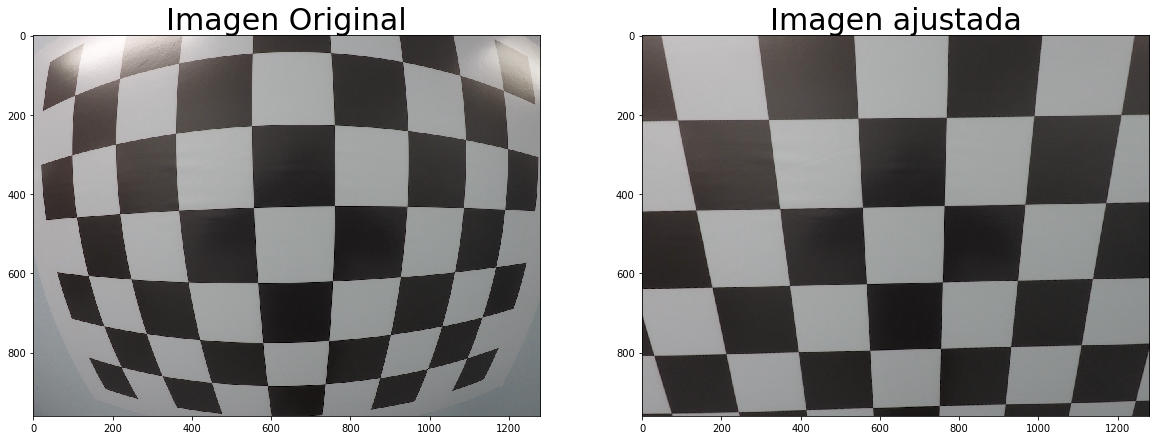

In [21]:
import pickle
%matplotlib inline

# Realice una prueba de distorsión
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Calibre la cámara dados los puntos del objeto y de la imagen
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Guarde el resultado de la calibración
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )

# Exhiba los resultados utilizando matplotlib
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Imagen Original', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Imagen ajustada', fontsize=30)